## K Nearest Neighbor
- Librerias

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
df = pd.read_csv('value_knn.csv')
x_red = df['x']
y_red = df['y']
x_blue = df['x1']
y_blue = df['y1']

new_point = [3,3]
new_x = new_point[0]
new_y = new_point[1]


## Graficado de puntos

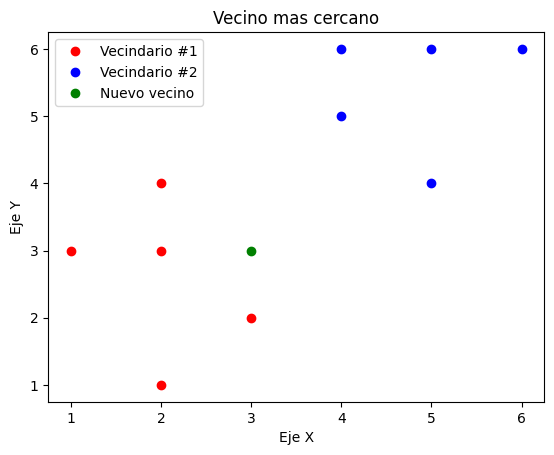

In [67]:

plt.figure()
plt.plot(x_red,y_red, 'ro', label='Vecindario #1')
plt.plot(x_blue,y_blue,'bo', label ='Vecindario #2')
plt.plot(new_x,new_y,'go', label = 'Nuevo vecino')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Vecino mas cercano')
plt.legend()
plt.show()

Distancia Euclidiana

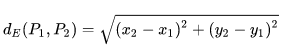

In [68]:
def euclid_dist(a,b):
    a = np.array(a)
    b = np.array(b)
    dist = np.sqrt(np.sum((b-a)**2))
    return dist



In [69]:
class Kvecinomascercano:
    def __init__(self, k=3):
        self.k = k
        self.puntos = None
    def entrenar(self, df):
        self.puntos = df
    
    def predecir(self, new_point):
        distancias = []
        for columna in self.puntos:
            for point in self.puntos[columna]:
                distancia = euclid_dist(point, new_point)
                distancias.append([distancia, columna])
        categorias = [columna[1] for columna in sorted(distancias)[:self.k]]
        result = Counter(categorias).most_common(1)[0][0]
        return result

                


Grupo: Vecindario #1


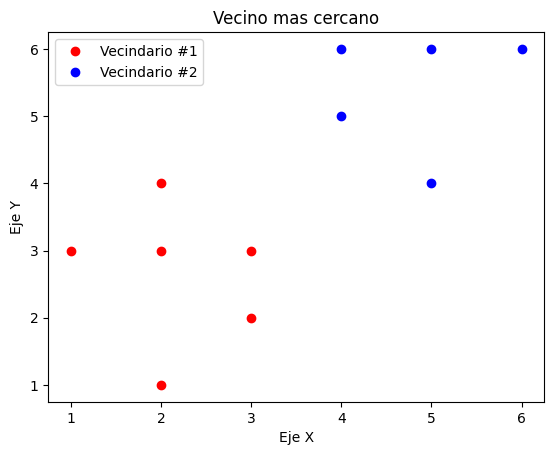

In [70]:
clf = Kvecinomascercano(k=3)
clf.entrenar(df)
grupo = clf.predecir(new_point)
if grupo == 'y' or grupo == 'x':
    print("\nGrupo: Vecindario #1")
    plt.figure()
    plt.plot(x_red,y_red, 'ro', label='Vecindario #1')
    plt.plot(x_blue,y_blue,'bo', label='Vecindario #2')
    plt.plot(new_x,new_y,'ro')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Vecino mas cercano')
    plt.legend()
    plt.show()
elif grupo == 'x1' or grupo == 'y1':
    print("\nGrupo: Vecindario #2")
    plt.figure()
    plt.plot(x_red,y_red, 'ro', label='Vecindario #1')
    plt.plot(x_blue,y_blue,'bo', label ='Vecindario #2')
    plt.plot(new_x,new_y,'bo')
    plt.title('Vecino mas cercano')
    plt.legend()
    plt.show()
else:
    print("\n Error en los datos de entrada.")
